<a href="https://colab.research.google.com/github/surekhagm16/MLProjects/blob/main/iris_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
import pandas as pd

In [12]:
df = pd.read_csv('https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv')

In [13]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [14]:
#check if there are null values
df.isnull().sum()

,0
sepal.length,0
sepal.width,0
petal.length,0
petal.width,0
variety,0


In [15]:
df['variety'] = df['variety'].replace({'Setosa': 0,
                                       'Versicolor':1,
                                       'Virginica':2})

<ipython-input-15-ca078c845e0a>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['variety'] = df['variety'].replace({'Setosa': 0,


In [16]:
df['variety'].unique()

array([0, 1, 2])

In [17]:
# Separate out features and labels
X = df.drop('variety', axis = 1)
y = df['variety']

In [18]:
X, y

(     sepal.length  sepal.width  petal.length  petal.width
 0             5.1          3.5           1.4          0.2
 1             4.9          3.0           1.4          0.2
 2             4.7          3.2           1.3          0.2
 3             4.6          3.1           1.5          0.2
 4             5.0          3.6           1.4          0.2
 ..            ...          ...           ...          ...
 145           6.7          3.0           5.2          2.3
 146           6.3          2.5           5.0          1.9
 147           6.5          3.0           5.2          2.0
 148           6.2          3.4           5.4          2.3
 149           5.9          3.0           5.1          1.8
 
 [150 rows x 4 columns],
 0      0
 1      0
 2      0
 3      0
 4      0
       ..
 145    2
 146    2
 147    2
 148    2
 149    2
 Name: variety, Length: 150, dtype: int64)

In [19]:
X.shape, y.shape

((150, 4), (150,))

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Petal width vs. target ')

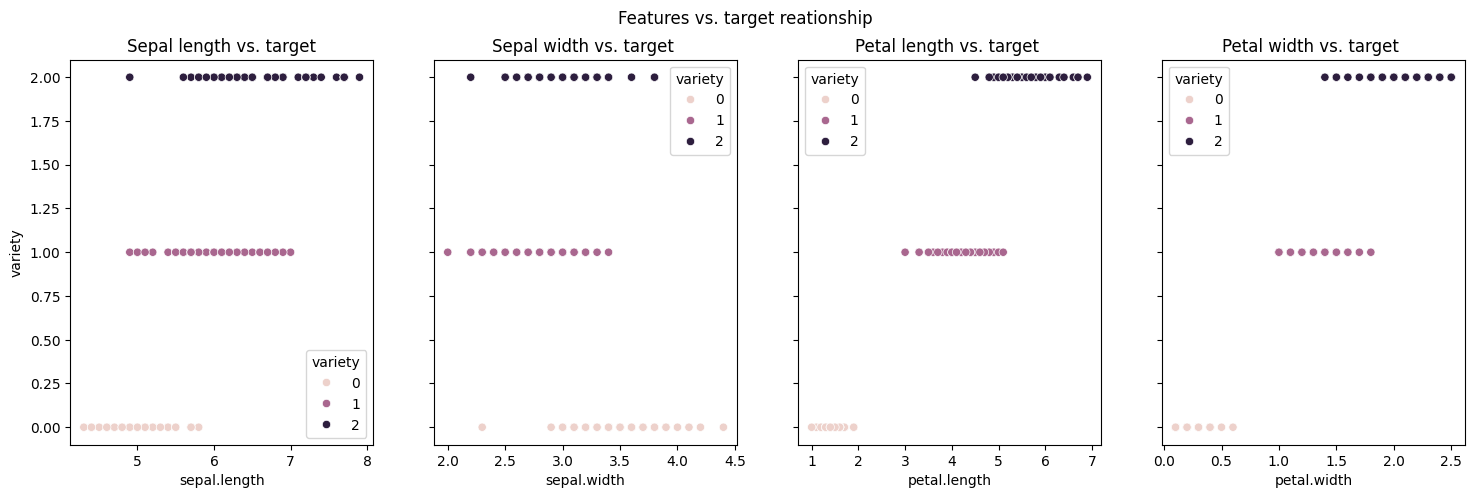

In [23]:
fig, axes = plt.subplots(1,4,figsize =(18,5), sharey=True)
fig.suptitle('Features vs. target reationship')
sns.scatterplot(ax= axes[0],data=df, x= df['sepal.length'], y=df['variety'], hue=df['variety'])
axes[0].set_title('Sepal length vs. target')
sns.scatterplot(ax= axes[1],data=df, x= df['sepal.width'], y=df['variety'], hue=df['variety'])
axes[1].set_title('Sepal width vs. target ')
sns.scatterplot(ax= axes[2],data=df, x= df['petal.length'], y=df['variety'], hue=df['variety'])
axes[2].set_title('Petal length vs. target ')
sns.scatterplot(ax= axes[3],data=df, x= df['petal.width'], y=df['variety'], hue=df['variety'])
axes[3].set_title('Petal width vs. target ')

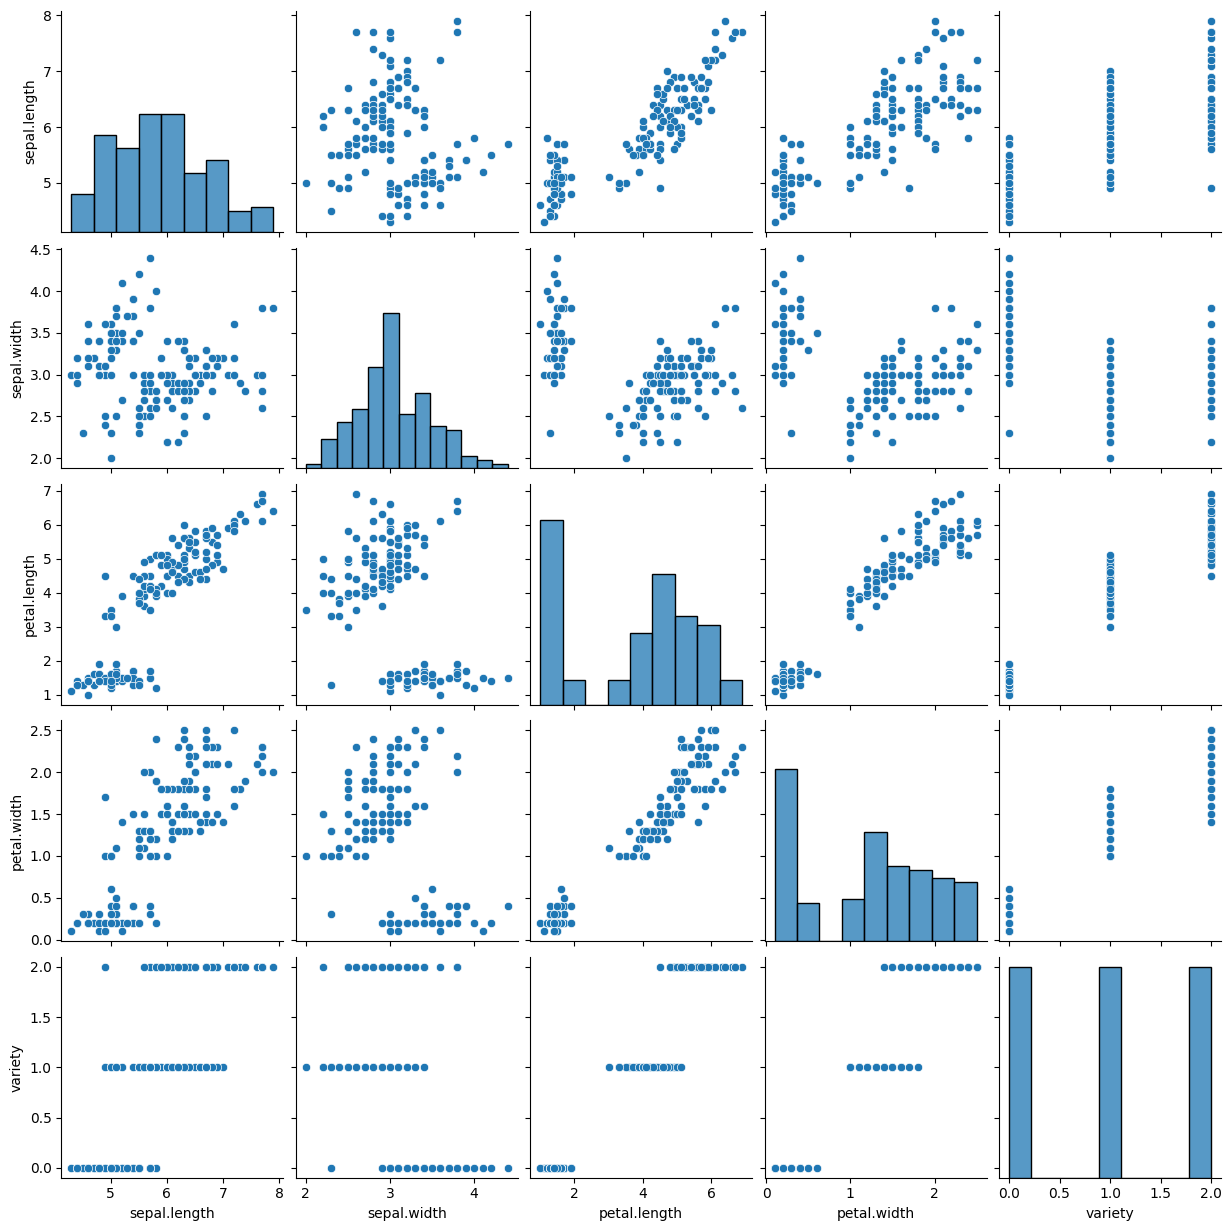

In [24]:
sns.pairplot(df)

In [25]:
#Split training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=42)

In [26]:
X_train[:5], X_test[:5]

(    sepal.length  sepal.width  petal.length  petal.width
 22           4.6          3.6           1.0          0.2
 15           5.7          4.4           1.5          0.4
 65           6.7          3.1           4.4          1.4
 11           4.8          3.4           1.6          0.2
 42           4.4          3.2           1.3          0.2,
      sepal.length  sepal.width  petal.length  petal.width
 73            6.1          2.8           4.7          1.2
 18            5.7          3.8           1.7          0.3
 118           7.7          2.6           6.9          2.3
 78            6.0          2.9           4.5          1.5
 76            6.8          2.8           4.8          1.4)

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [28]:
#Create the model
tf.random.set_seed = 42
model = tf.keras.Sequential([
   layers.Dense(50, activation= 'relu'),
   layers.Dense(10, activation = 'relu'),
   layers.Dense(3, activation= 'linear')
])

In [29]:
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [30]:
X_test = scaler.transform(X_test)

In [31]:
model.fit(X_train, y_train, epochs = 50)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.1150 - loss: 1.1183
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1442 - loss: 1.0768
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3615 - loss: 1.0469 
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4583 - loss: 0.9998 
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4935 - loss: 0.9819 
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6596 - loss: 0.9296
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6640 - loss: 0.9404 
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8267 - loss: 0.8826 
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8350 - loss: 0.8690
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8233 - loss: 0.8475 
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7944 - loss: 0.8267 
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8196 - loss: 0.7958 
E

In [32]:
model.evaluate(X_test,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - accuracy: 1.0000 - loss: 0.1705


[0.17050878703594208, 1.0]

In [33]:
y_preds = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


In [71]:
import numpy as np

In [72]:
y_preds_f = np.argmax(y_preds , axis=1)
y_preds_f

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

Text(50.722222222222214, 0.5, 'Truth')

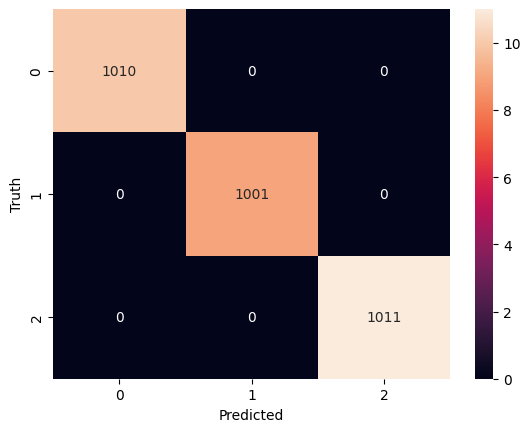

In [77]:
#confusion matrix
cm1 = tf.math.confusion_matrix(y_test, y_preds_f)
sns.heatmap(cm1, fmt='b', annot =True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
from sklearn import classification_report

In [78]:
print(classification_report(y_test, y_preds_f, labels= [0,1,2], target_names = ['Setosa',
                                       'Versicolor',
                                       'Virginica']))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      1.00      1.00         9
   Virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

